Reading from the files and separating participants who completed the tasks from the rest.

In [1]:
import json
import numpy as np
import scipy.stats as stats
import statistics
from statsmodels.sandbox.stats.multicomp import multipletests
import seaborn as sns
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [2]:
def nasa_string_to_int(nasa_string):
    sn= nasa_string.replace('[','').replace(']','').split(',')
    ntr1 = [int(y) for y in sn]
    return ntr1

In [3]:
def sak_data_to_througput(sak1, sak1t ,diflevel):
    if(len(sak1)>0):
        l= len(sak1[0].replace(" ",''))
        t= sak1t[len(sak1t)-1]-sak1t[0]
        SPC=(float(t)/diflevel)/l
        T=(1/float(SPC))*(1000/float(diflevel))*(60/5)
    else:
        T=0
        
    return T
        

In [4]:
# Opening JSON file
f = open('output2-99p.json')

In [5]:
data = json.load(f)

In [6]:
# for x in data['data']:
#     keys = x.keys()
#     print(keys)
#     values = x.values()
#     print(values)
#     print(x['completed'])
    

In [7]:
completed_participants=[]
for x in data['data']:
    if(x['completed']):
        completed_participants.append(x['mturk_id'])
# print(completed_participants)

completed_participants

['62a1e48f9b6f6ae44dbb9f88',
 '5fd66c119e1fc75723a40b51',
 '60356e7fa40d4ebe1700d736',
 '5bd7912fbeca730001ced776',
 '60b904a66604f5e79c6066dd',
 '5b661bc3259daf00019369f2',
 '5baa21188a01680001ff1a6f',
 '62838b88bc35e0497491f8e4',
 '6023df50d5c2d7069115de3f',
 '60c048ca962103e0da201a34',
 '5b61d0768de04c000171cf1b',
 '6128188a420f8d3f27f8d8b1',
 '62b1f567d5f22515024421f1',
 '60b7ae30dc4cd72192734427',
 '6055063167ae2fa5dcb083a3',
 '5ec153013043d0034ac516bd',
 '60b005fde343f75a2b76d406',
 '609c2dcbc88bdd19e0be4b98',
 '60a0c79b332c02c8a73e57a5',
 '5e7987df47422a5443426cd7',
 '606825124609b3da3a68e07c',
 '61013bb782e4014ecabafee1',
 '60214feec65df50cd6837a48',
 '5fa154fd4cbe97227182aff7',
 '612266b4f9ae4a5d04a21dd4',
 '5f3287b83428cb05746e2214',
 '5a75b131eea3d300016ddc70',
 '615e0f1896ecb10608aa6eca',
 '5e6473fbc15dbe1f71eea95b',
 '5bc880109f7801000148601b',
 '60de9d0dc5c9e34e09b6385d',
 '5d8186b89d5990001958d771',
 '601f249c952eef4747d890ae',
 '5cfd0b3f0526d1000184ad8f',
 '62e49d54d098

In [8]:
f = open('output1-99p.json')

In [9]:
jsonpmodel = json.load(f)

In [10]:
# for x in data['data']:
#     keys = x.keys()
#     print(keys)
#     print('\n')
#     values = x.values()
#     print(values)

In [11]:
completed_p_models=[]
for x in jsonpmodel['data']:
#     print(x['sequence_type'])
    m=x['mturk_id']
    if(m in completed_participants):
        completed_p_models.append(x)
        

In [12]:
filename='completedparticipants.json'
with open(filename, 'w') as json_file:
    json.dump(completed_p_models, json_file, 
                        indent=4,  
                        separators=(',',': '))

In [13]:
c_file=open(filename)
c_p=json.load(c_file)

In [14]:
# for x in c_p:
#     print(x['mturk_id'])


completedparticipants.json is the file that includes data of all participants who completed the task 
and c_p is the json varible of the file



In [15]:
# ----------------Experiment Sequences---------------------------

# N : first nbackn difficulty (H/E)

# Q : first Questionaire (1: NASA-TLX and 2: MRQ)

# S : SakeDifficulty(H/E)

# _________________________________________________________________________
# seq_number/Progress | 1.n1 | 2.s | 3.q1| 4.q2|5.n2 | 6.s |7.q1 |8.q2 |
# _________________________________________________________________________
#          1          |  E   | E   |  1  |  2  |  H  |  E  |  1  |  2  |
#          2          |  E   | E   |  2  |  1  |  H  |  E  |  2  |  1  |
#          3          |  H   | E   |  1  |  2  |  E  |  E  |  1  |  2  |
#          4          |  H   | E   |  2  |  1  |  E  |  E  |  2  |  1  |
#          5          |  E   | H   |  1  |  2  |  H  |  H  |  1  |  2  |
#          6          |  E   | H   |  2  |  1  |  H  |  H  |  2  |  1  |
#          7          |  H   | H   |  1  |  2  |  E  |  H  |  1  |  2  |
#          8          |  H   | H   |  2  |  1  |  E  |  H  |  2  |  1  |
# ________________________________________________________________________


In [16]:
 #  sequence type /progress matrix 
E_n = 1; # easy nbackn
H_n = 3; # hard nbackn
E_s = 500;  # easy sak in ms
H_s = 1000; #hard sak in ms
seq_prog = [
    [E_n, E_s, 1, 2, H_n, E_s, 1, 2],
    [E_n, E_s, 2, 1, H_n, E_s, 2, 1],
    [H_n, E_s, 1, 2, E_n, E_s, 1, 2],
    [H_n, E_s, 2, 1, E_n, E_s, 2, 1],
    [E_n, H_s, 1, 2, H_n, H_s, 1, 2],
    [E_n, H_s, 2, 1, H_n, H_s, 2, 1],
    [H_n, H_s, 1, 2, E_n, H_s, 1, 2],
    [H_n, H_s, 2, 1, E_n, H_s, 2, 1]
];

conEX : Easy NBACKN----
conHX : Hard NBACKN----
conXE: Easy SAK----
conXH: Hard SAK

In [17]:
nasa_1_t_array=[]
nasa_2_t_array=[]
nasa_1_r_array=[]
nasa_2_r_array=[]

seq_type_array=[]

mrq_1_array=[]
mrq_2_array=[]

mrq_conEH_array=[]
mrq_conHH_array=[]
mrq_conEE_array=[]
mrq_conHE_array=[]

nasa_r_conEH_array=[]
nasa_r_conHH_array=[]
nasa_r_conEE_array=[]
nasa_r_conHE_array=[]

nasa_t_conEH_array=[]
nasa_t_conHH_array=[]
nasa_t_conEE_array=[]
nasa_t_conHE_array=[]

throughput1_array=[]
throughput2_array=[]


for x in c_p:
    st= x['sequence_type']
    seq_type_array.append(st)
    
    sak1= x['sak_1_actions']
    sak2= x['sak_2_actions']
    sak1t= x['sak_1_actions_t']
    sak2t= x['sak_2_actions_t']
#     print(len(x['nasa_1_r']))

    if(len(x['nasa_1_r'])>0):
        ntr1= nasa_string_to_int(x['nasa_1_r'][0])
    else: 
        ntr1=[]
        
    if(len(x['nasa_2_r'])>0):
        ntr2= nasa_string_to_int(x['nasa_2_r'][0])
    else: 
        ntr2=[]
        
    if(len(x['nasa_1_t'])>0):
        ntt1= nasa_string_to_int(x['nasa_1_t'][0])
    else: 
        ntt1=[]
        
    if(len(x['nasa_2_t'])>0):
        ntt2= nasa_string_to_int(x['nasa_2_t'][0])
    else: 
        ntt2=[]
    
    
    nasa_1_r_array.append(ntr1)
    nasa_1_t_array.append(ntt1)
    nasa_2_r_array.append(ntr2)
    nasa_2_t_array.append(ntt2)
    
    
    
    if(len(x['mrq_1'])>0): 
        s=x['mrq_1'][0].replace('"','').replace('[',"").replace(']',"").split(',')
        mrq1 = [int(y) for y in s]
        mrq1.pop()
    else: 
        mrq1=[] 
        
        

    if(len(x['mrq_2'])>0): 
        s=x['mrq_2'][0].replace('"','').replace('[',"").replace(']',"").split(',')
        mrq2 = [int(y) for y in s]
        mrq2.pop()
    else: 
        mrq2=[]
        
        
        
    mrq_1_array.append(mrq1)
    mrq_2_array.append(mrq2)
    
    if(st==1 or st==2):
        if(len(mrq1)>0 and len(mrq2)>0):
            mrq_conEE_array.append(mrq1)
            mrq_conHE_array.append(mrq2)
            
        if(len(ntr1)>0 and len(ntr2)>0):
            nasa_r_conEE_array.append(ntr1)
            nasa_r_conHE_array.append(ntr2)
            nasa_t_conEE_array.append(ntt1)
            nasa_t_conHE_array.append(ntt2)
        #-------------------------------
        throughput1= sak_data_to_througput(sak1,sak1t, E_s)
        throughput2= sak_data_to_througput(sak2,sak2t, E_s)
        

       
    if(st==3 or st==4):
        if(len(mrq1)>0 and len(mrq2)>0):
            mrq_conHE_array.append(mrq1)
            mrq_conEE_array.append(mrq2)
            
        if(len(ntr1)>0 and len(ntr2)>0):
            nasa_r_conHE_array.append(ntr1)
            nasa_r_conEE_array.append(ntr2)
            nasa_t_conHE_array.append(ntt1)
            nasa_t_conEE_array.append(ntt2)
        #-------------------------------
        throughput1= sak_data_to_througput(sak1,sak1t, E_s)
        throughput2= sak_data_to_througput(sak2,sak2t, E_s)


        
    if(st==5 or st==6):
        if(len(mrq1)>0 and len(mrq2)>0):
            mrq_conEH_array.append(mrq1)
            mrq_conHH_array.append(mrq2)
            
        if(len(ntr1)>0 and len(ntr2)>0): 
            nasa_r_conEH_array.append(ntr1)
            nasa_r_conHH_array.append(ntr2)
            nasa_t_conEH_array.append(ntt1)
            nasa_t_conHH_array.append(ntt2)
        #-------------------------------
        throughput1= sak_data_to_througput(sak1,sak1t, H_s)
        throughput2= sak_data_to_througput(sak2,sak2t, H_s)
        

        
        
    if(st==7 or st==8):
        if(len(mrq1)>0 and len(mrq2)>0):
            mrq_conHH_array.append(mrq1)
            mrq_conEH_array.append(mrq2)
            
        if(len(ntr1)>0 and len(ntr2)>0): 
            nasa_r_conHH_array.append(ntr1)
            nasa_r_conEH_array.append(ntr2)
            nasa_t_conHH_array.append(ntt1)
            nasa_t_conEH_array.append(ntt2)
        #-------------------------------
        throughput1= sak_data_to_througput(sak1,sak1t, H_s)
        throughput2= sak_data_to_througput(sak2,sak2t, H_s)
        
    
    throughput1_array.append(throughput1)
    throughput2_array.append(throughput2)
        
        


In [18]:
 mrq_2_array
    

[[0, 4, 0, 0, 4, 4, 3, 3, 2, 2, 4, 2, 0, 2, 1, 2, 0],
 [0, 0, 0, 0, 4, 3, 4, 3, 2, 3, 2, 1, 0, 4, 4, 4, 0],
 [0, 3, 0, 0, 4, 3, 0, 1, 0, 4, 0, 3, 0, 4, 3, 3, 0],
 [2, 2, 0, 0, 0, 4, 4, 2, 2, 2, 2, 0, 0, 3, 2, 3, 0],
 [1, 2, 1, 1, 4, 4, 4, 3, 4, 4, 3, 3, 4, 4, 3, 3, 1],
 [0, 0, 0, 0, 1, 1, 1, 0, 2, 3, 1, 0, 0, 4, 0, 4, 0],
 [0, 4, 0, 0, 2, 3, 4, 2, 2, 3, 3, 0, 0, 4, 3, 3, 0],
 [0, 0, 0, 0, 3, 2, 3, 3, 1, 4, 4, 3, 0, 4, 4, 4, 0],
 [2, 4, 4, 4, 4, 3, 3, 2, 4, 3, 4, 2, 3, 4, 3, 3, 0],
 [0, 0, 0, 0, 1, 2, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 3, 2, 2, 3, 3, 2, 2, 0, 0, 3, 2, 4, 0],
 [0, 0, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0],
 [0, 4, 0, 0, 0, 3, 4, 0, 1, 1, 3, 0, 0, 0, 3, 2, 0],
 [0, 2, 0, 2, 3, 1, 2, 1, 3, 1, 1, 3, 0, 3, 2, 3, 0],
 [4, 4, 0, 0, 3, 4, 4, 4, 0, 1, 1, 0, 0, 3, 4, 4, 0],
 [0, 0, 0, 0, 4, 2, 2, 1, 1, 0, 3, 0, 0, 3, 1, 2, 0],
 [1, 1, 1, 3, 3, 2, 4, 3, 3, 2, 3, 3, 2, 3, 2, 2, 1],
 [0, 1, 0, 0, 3, 4, 4, 1, 0, 0, 4, 0, 0, 4, 1, 4, 0],
 [0, 2, 0, 0, 2, 1, 0, 0, 0,

In [19]:
throughput2_array

[2.7484001347254967,
 2.8360972151100956,
 3.0654081463221483,
 1.9932924128330063,
 1.2902866108869924,
 1.6989346264113547,
 0,
 3.4656129802958895,
 1.7933128308386885,
 2.2863830916526604,
 1.7431256825897254,
 2.6716485814126822,
 3.567957001543828,
 1.422636079990947,
 1.4020329477742726,
 2.339002872905703,
 1.9030120086619857,
 3.0326533102108044,
 2.980070776680946,
 3.4696048161419233,
 2.6693784161688066,
 2.6283201496120703,
 1.1969975311925918,
 1.553556071352611,
 2.9128334587469964,
 1.4191377593645926,
 1.0882334755456626,
 1.4909021087229066,
 2.120077130425126,
 3.023812523623535,
 1.6394876054737026,
 3.949657539614125,
 2.9697140370190214,
 4.839278813032446,
 2.6600985221674875,
 0,
 1.4580906160432854,
 3.592814371257485,
 2.3607718412380936,
 3.2581396927393254,
 2.3144654088050314,
 2.8371161548731645,
 2.390996660849491,
 1.9430548572110347,
 3.2713146595788185,
 2.0021074815595368,
 2.079131754579288,
 4.71721291337035,
 1.8910826448141562,
 4.074557249316439,

<b>Starting the analysis from here:

<hr style="width:100%;text-align:left;margin-left:0">

<b>Analysis 1: Paired t-test to see effect of first task on second one 

-----------------------------------------------------------------------------------------------------------------------

<b>First Part for MRQ:</b>

r_mrq_pttest, p_mrq_pttest for each dimension separately and for r_mrq_avg,p_mrq_avg for total average as the last element.

p_mrq_pttest_adjusted is the adjusted p-values after boneferroni

In [20]:
mrqEX= mrq_conEE_array + mrq_conEH_array

In [21]:
mrqHX= mrq_conHE_array + mrq_conHH_array

In [22]:
mrqEX=np.array(mrqEX)

In [23]:
mrqHX=np.array(mrqHX)

In [24]:
r_mrq_pttest=[]
p_mrq_pttest=[]

for i in range(len(mrqHX[0])):
    r,p = stats.ttest_rel(mrqHX[:,i], mrqEX[:,i])
    r_mrq_pttest.append(r)
    p_mrq_pttest.append(p)
    
mrqHX_avg_array= np.mean(mrqHX, axis=1)
mrqEX_avg_array= np.mean(mrqEX, axis=1)
r_mrq_avg,p_mrq_avg = stats.ttest_rel(mrqHX_avg_array,mrqEX_avg_array)

r_mrq_pttest.append(r_mrq_avg)
p_mrq_pttest.append(p_mrq_avg)

In [44]:
p_mrq_pttest

[0.03407951684150649,
 0.6806871469304578,
 0.04451692927039891,
 0.0883617860803265,
 0.468987882266515,
 0.26624295611636317,
 0.4278214491379191,
 0.1018028419095543,
 0.28787848128350474,
 0.5396463010919387,
 0.10598191798460302,
 0.6690203886240371,
 0.3505533956313803,
 0.8414282439601026,
 0.6389796182952435,
 0.7456337917860583,
 0.11504763994681916,
 0.10440437831993295]

In [25]:
p_mrq_pttest_adjusted = multipletests(p_mrq_pttest, alpha=0.05, method='bonferroni')

In [26]:
p_mrq_pttest_adjusted

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]),
 array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.58084802, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 0.002845571131556368,
 0.002777777777777778)

In [27]:
p_mrq_pttest

[0.4845452069267472,
 0.3064682531710686,
 0.6824691758413888,
 0.08814012262924528,
 0.6141853378134425,
 0.5833261904352833,
 0.6289387648115619,
 0.03226933456988775,
 0.25023987041412965,
 0.7099732718172919,
 0.8167016975851018,
 0.5790211294686735,
 0.2808554445053354,
 0.13010863576980447,
 0.25340168965859183,
 0.8441960336353125,
 0.08814012262924528,
 0.5510200889465597]

<b>Second Part for NASA-TLX:</b>

r_nasa_pttest, p_nasa_pttest for each dimension separately and for r_nasa_avg,p_nasa_avg for total average as the last element.

p_nasa_pttest_adjusted is the adjusted p-values after boneferroni

In [28]:
nasaEX= nasa_r_conEE_array + nasa_r_conEH_array

In [29]:
nasaHX= nasa_r_conHE_array + nasa_r_conHH_array

In [30]:
nasaEX=np.array(nasaEX)

In [31]:
nasaHX=np.array(nasaHX)

In [32]:
r_nasa_pttest=[]
p_nasa_pttest=[]

for i in range(len(nasaHX[0])):
    r,p = stats.ttest_rel(nasaHX[:,i], nasaEX[:,i])
    r_nasa_pttest.append(r)
    p_nasa_pttest.append(p)
    
nasaHX_avg_array= np.mean(nasaHX, axis=1)
nasaEX_avg_array= np.mean(nasaEX, axis=1)
r_nasa_avg,p_nasa_avg = stats.ttest_rel(nasaHX_avg_array,nasaEX_avg_array)

r_nasa_pttest.append(r_nasa_avg)
p_nasa_pttest.append(p_nasa_avg)

In [45]:
p_nasa_pttest_adjusted = multipletests(p_nasa_pttest, alpha=0.05, method='bonferroni')

In [46]:
p_nasa_pttest

[0.032237484097584986,
 0.8823599490069501,
 0.1767316697349605,
 0.7992122381303003,
 0.09208860831795304,
 0.4358875606041561,
 0.4732997278954202]

In [47]:
p_nasa_pttest_adjusted

(array([False, False, False, False, False, False, False]),
 array([0.22566239, 1.        , 1.        , 1.        , 0.64462026,
        1.        , 1.        ]),
 0.007300831979014655,
 0.0071428571428571435)

<hr style="width:100%;text-align:left;margin-left:0">

<b> Analysis 2: two-sample t-test to see effect of one-key text entry task difficulty on questionaires

<b>First Part for MRQ:</b>

r_mrq_pttest, p_mrq_pttest for each dimension separately and for r_mrq_avg,p_mrq_avg for total average as the last element.

p_mrq_pttest_adjusted is the adjusted p-values after boneferroni

In [48]:
mrqXE= mrq_conEE_array + mrq_conHE_array

In [49]:
mrqXH= mrq_conEH_array + mrq_conHH_array

In [50]:
mrqEX=np.array(mrqXE) #just did not want the notation. do not confuse EX and XE 

In [51]:
mrqHX=np.array(mrqXH) #just did not want the notation. do not confuse EX and XE 

In [52]:
r_mrq_pttest=[]
p_mrq_pttest=[]

for i in range(len(mrqHX[0])):
    r,p = stats.ttest_ind(mrqHX[:,i], mrqEX[:,i], equal_var=True)
    r_mrq_pttest.append(r)
    p_mrq_pttest.append(p)
    
mrqHX_avg_array= np.mean(mrqHX, axis=1)
mrqEX_avg_array= np.mean(mrqEX, axis=1)
r_mrq_avg,p_mrq_avg = stats.ttest_ind(mrqHX_avg_array,mrqEX_avg_array, equal_var=True)

r_mrq_pttest.append(r_mrq_avg)
p_mrq_pttest.append(p_mrq_avg)

In [53]:
p_mrq_pttest_adjusted = multipletests(p_mrq_pttest, alpha=0.05, method='bonferroni')

In [54]:
p_mrq_pttest_adjusted

(array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False]),
 array([0.6134313 , 1.        , 0.80130473, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ]),
 0.002845571131556368,
 0.002777777777777778)

In [55]:
p_mrq_pttest

[0.03407951684150649,
 0.6806871469304578,
 0.04451692927039891,
 0.0883617860803265,
 0.468987882266515,
 0.26624295611636317,
 0.4278214491379191,
 0.1018028419095543,
 0.28787848128350474,
 0.5396463010919387,
 0.10598191798460302,
 0.6690203886240371,
 0.3505533956313803,
 0.8414282439601026,
 0.6389796182952435,
 0.7456337917860583,
 0.11504763994681916,
 0.10440437831993295]

<b>Second Part for NASA-TLX:</b>

r_nasa_pttest, p_nasa_pttest for each dimension separately and for r_nasa_avg,p_nasa_avg for total average as the last element.

p_nasa_pttest_adjusted is the adjusted p-values after boneferroni

In [56]:
nasaXE= nasa_r_conEE_array + nasa_r_conHE_array

In [57]:
nasaXH= nasa_r_conHH_array + nasa_r_conEH_array

In [58]:
nasaEX=np.array(nasaXE) #just did not want the notation. do not confuse EX and XE 

In [59]:
nasaHX=np.array(nasaXH) #just did not want the notation. do not confuse EX and XE 

In [60]:
r_nasa_pttest=[]
p_nasa_pttest=[]

for i in range(len(nasaHX[0])):
    r,p = stats.ttest_ind(nasaHX[:,i], nasaEX[:,i], equal_var=True)
    r_nasa_pttest.append(r)
    p_nasa_pttest.append(p)
    
nasaHX_avg_array= np.mean(nasaHX, axis=1)
nasaEX_avg_array= np.mean(nasaEX, axis=1)
r_nasa_avg,p_nasa_avg = stats.ttest_ind(nasaHX_avg_array,nasaEX_avg_array, equal_var=True)

r_nasa_pttest.append(r_nasa_avg)
p_nasa_pttest.append(p_nasa_avg)

In [61]:
p_nasa_pttest_adjusted = multipletests(p_nasa_pttest, alpha=0.05, method='bonferroni')

In [62]:
p_nasa_pttest

[0.5675858025735263,
 0.4186675543402252,
 0.08159975709162907,
 0.06052216696804646,
 0.05095970726304729,
 0.8662378632555212,
 0.1659373243945405]

In [63]:
p_nasa_pttest_adjusted

(array([False, False, False, False, False, False, False]),
 array([1.        , 1.        , 0.5711983 , 0.42365517, 0.35671795,
        1.        , 1.        ]),
 0.007300831979014655,
 0.0071428571428571435)

<hr style="width:100%;text-align:left;margin-left:0">
<hr style="width:100%;text-align:left;margin-left:0">

<b> Analysis 3: Pearson Correlation to see the correlation of two questionaires' scale

In [64]:
nasa_r_array_pc = []
nasa_r_array_pc.extend(nasa_1_r_array)
nasa_r_array_pc.extend(nasa_2_r_array)

mrq_array_pc = []
mrq_array_pc.extend(mrq_1_array)
mrq_array_pc.extend(mrq_2_array)

nasa_r_array_pc=np.array(nasa_r_array_pc,dtype=object)
mrq_array_pc=np.array(mrq_array_pc,dtype=object)
print(mrq_array_pc.shape)


#-------------------------------------------------------------------------------------
to_delete_indices=[]
for i in range(len(mrq_array_pc)):
    if(len(nasa_r_array_pc[i])==0 or len(mrq_array_pc[i])==0):
        to_delete_indices.append(i)




cleaned_nasa_r_array_pc=[]
cleaned_mrq_array_pc=[]


for t in range(len(mrq_array_pc)):
    if t in  to_delete_indices:
        print('KACJ')
    else:
        cleaned_nasa_r_array_pc.append(nasa_r_array_pc[t])
        cleaned_mrq_array_pc.append(mrq_array_pc[t])
#-------------------------------------------------------------------------------------

(196, 17)
KACJ
KACJ
KACJ
KACJ
KACJ


In [65]:
nasa_r_array_pc=np.array(cleaned_nasa_r_array_pc)
mrq_array_pc=np.array(cleaned_mrq_array_pc)

nasa_r_array_pc_avg = []
mrq_array_pc_avg = []

for i in range(len(nasa_r_array_pc)):
    nasa_r_array_pc_avg.append(np.mean(nasa_r_array_pc[i]))
    mrq_array_pc_avg.append(np.mean(mrq_array_pc[i]))


# print(mrq_array_pc.shape)

    
new_mrq_array_pc = []
new_nasa_r_array_pc = []

for i in range(len(nasa_r_array_pc)):
    tmpn=[nasa_r_array_pc_avg[i]]
    tmpm=[mrq_array_pc_avg[i]]
    
    for j in range(len(mrq_array_pc[i])):
        tmpm.append(mrq_array_pc[i][j])
        
    for k in range(len(nasa_r_array_pc[i])):
        tmpn.append(nasa_r_array_pc[i][k])
    
    
    new_mrq_array_pc.append(tmpm)
    new_nasa_r_array_pc.append(tmpn)

In [66]:
for ix in range(len(mrq_array_pc_avg)):
    new_mrq_array_pc.append(np.append(mrq_array_pc_avg[ix],mrq_array_pc[ix]))
    new_nasa_r_array_pc.append(np.append(nasa_r_array_pc_avg[ix],nasa_r_array_pc[ix]))

In [67]:
new_mrq_array_pc = np.array(new_mrq_array_pc)

In [68]:
new_nasa_r_array_pc = np.array(new_nasa_r_array_pc)

In [69]:
new_mrq_array_pc= np.transpose(new_mrq_array_pc)

In [70]:
new_nasa_r_array_pc=  np.transpose(new_nasa_r_array_pc)

In [71]:
c_matrix=np.zeros((len(new_nasa_r_array_pc),len(new_mrq_array_pc)))
p_matrix=np.zeros((len(new_nasa_r_array_pc),len(new_mrq_array_pc)))
for i in range(len(new_nasa_r_array_pc)):
    for j in range(len(new_mrq_array_pc)):
        c,p = stats.pearsonr(new_nasa_r_array_pc[i], new_mrq_array_pc[j])
        c_matrix[i][j]=c
        p_matrix[i][j]=p

In [72]:
rej_matrix, p_matrix_adjusted, c_b, p_b = multipletests(p_matrix.reshape(-1), alpha=0.05, method='bonferroni')
p_matrix_adjusted

array([9.13601480e-05, 4.20834160e-04, 2.00604099e-03, 2.98905412e-01,
       5.65398543e-01, 2.90139989e-03, 8.07882754e-02, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 4.27200813e-02, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.08137722e-02, 4.45022910e-04,
       1.11042590e-04, 7.89316946e-01, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       1.11041074e-02, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
       2.14172431e-09, 8.41369224e-03, 1.78237774e-02, 6.76162716e-01,
       2.32798587e-05, 1.42910441e-09, 3.63014480e-03, 1.00000000e+00,
       5.33170482e-01, 3.10835736e-01, 1.00000000e+00, 5.74447982e-01,
       9.57452923e-07, 6.50559883e-13, 1.00000000e+00, 2.78324462e-01,
       1.00000000e+00, 1.50051603e-03, 5.69173624e-03, 1.00000000e+00,
      

Correllation of average values and each dimention separately-- zero indices are for averages

In [73]:
p_matrix_adjusted= np.array(p_matrix_adjusted).reshape(7,18)
rej_matrix= np.array(rej_matrix).reshape(7,18)

In [74]:
rej_matrix

array([[ True,  True,  True, False, False,  True, False, False, False,
        False, False, False, False,  True, False, False, False, False],
       [ True,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False,  True, False, False, False],
       [ True,  True,  True, False,  True,  True,  True, False, False,
        False, False, False,  True,  True, False, False, False,  True],
       [ True, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False,  True,  True, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False],
       [False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False]]

<AxesSubplot:>

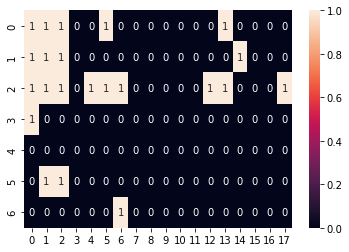

In [77]:
sns.heatmap(rej_matrix,annot=True)

In [78]:
p_matrix_adjusted

array([[9.13601480e-05, 4.20834160e-04, 2.00604099e-03, 2.98905412e-01,
        5.65398543e-01, 2.90139989e-03, 8.07882754e-02, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 4.27200813e-02, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [1.08137722e-02, 4.45022910e-04, 1.11042590e-04, 7.89316946e-01,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 1.11041074e-02, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00],
       [2.14172431e-09, 8.41369224e-03, 1.78237774e-02, 6.76162716e-01,
        2.32798587e-05, 1.42910441e-09, 3.63014480e-03, 1.00000000e+00,
        5.33170482e-01, 3.10835736e-01, 1.00000000e+00, 5.74447982e-01,
        9.57452923e-07, 6.50559883e-13, 1.00000000e+00, 2.78324462e-01,
        1.00000000e+00, 1.50051603e-03],
       [5.691

<hr style="width:100%;text-align:left;margin-left:0">
<hr style="width:100%;text-align:left;margin-left:0">

<b>ANALYSIS 4:  Factor Analysis -- Determining which scales are better predictors 
    

In [79]:
fa_array = []

for ix in range(len(mrq_array_pc)):
    fa_array.append(np.append(mrq_array_pc[ix],nasa_r_array_pc[ix]))

fa_array=np.array(fa_array,dtype='float')

In [80]:
chi_square_value,p_value=calculate_bartlett_sphericity(fa_array)
chi_square_value, p_value

(1467.482065401292, 5.2811763780118026e-170)

In [81]:
kmo_all,kmo_model = calculate_kmo(fa_array)

In [82]:
kmo_all,kmo_model

(array([0.84168965, 0.79622397, 0.76575781, 0.78666976, 0.79286171,
        0.67799805, 0.69391364, 0.78857573, 0.84277569, 0.79744973,
        0.81891489, 0.84968866, 0.87800312, 0.64573164, 0.7539244 ,
        0.70025401, 0.84728071, 0.74901987, 0.76839128, 0.80208523,
        0.4639596 , 0.69872339, 0.71837445]),
 0.7717090864489947)

In [83]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
#fa.analyze(fa_array, 25, rotation=None)
fa.fit(fa_array, 23)
eigen_values, vectors = fa.get_eigenvalues()
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.11220199, 2.64478546, 2.17920889, 1.60579301, 1.24941527,
       1.16193726, 1.0959769 , 0.89695506, 0.78371268, 0.70090868,
       0.66096393, 0.60587251, 0.5755301 , 0.53810231, 0.47943532,
       0.45645873, 0.41962643, 0.37093048, 0.36591199, 0.32570352,
       0.2959113 , 0.26145046, 0.21320772])

In [84]:
fa = FactorAnalyzer()
fa.fit(fa_array,2)
fa.loadings_

array([[ 0.5875872 , -0.06432122,  0.10660445],
       [ 0.25622868,  0.0911095 ,  0.19764831],
       [ 0.77616187, -0.20295157, -0.05057379],
       [ 0.8335208 , -0.10922486, -0.09680979],
       [ 0.10975834,  0.3025646 ,  0.14558604],
       [-0.09544841,  0.46608076,  0.16470117],
       [-0.13463595,  0.60102094,  0.02425413],
       [ 0.10324821,  0.61214224, -0.13743204],
       [ 0.24260147,  0.58107867, -0.14870673],
       [-0.03748997,  0.72837657, -0.04131819],
       [ 0.01768927,  0.53549195, -0.01115564],
       [ 0.27045169,  0.39589286, -0.09784185],
       [ 0.49293103,  0.14947857,  0.00283765],
       [-0.02727176,  0.37516936,  0.0685313 ],
       [ 0.40251322,  0.1440579 , -0.04366189],
       [-0.15273049,  0.49827866, -0.10309154],
       [ 0.79262801, -0.10062049, -0.08085165],
       [ 0.0297035 , -0.02756677,  0.70849904],
       [ 0.25230529,  0.06970597,  0.36701041],
       [-0.02076724,  0.09688294,  0.56267664],
       [-0.05303242, -0.07210389,  0.305

In [85]:
# Get variance of each factors
fa.get_factor_variance()
# Exploratory Factor Analysis To find how many factors are present in the data
# Finding how many factors are present in the data


# fa = FactorAnalyzer()
# Factors=fa.fit(fa_array)
 
# # Plotting the scree-plot
# EigenValues=Factors.get_eigenvalues()

# plt.plot(EigenValues)

(array([3.06588058, 2.95002313, 2.48634618]),
 array([0.13329916, 0.12826188, 0.10810201]),
 array([0.13329916, 0.26156103, 0.36966304]))

-------------------------------------------------------------------------------------------------------------------------------

<hr style="width:100%;text-align:left;margin-left:0">
<b>ANALYSIS 5: Performance vs MWL

In [86]:
mrq_t_pq = mrq_1_array + mrq_2_array

In [87]:
nasa_r_t_pq = nasa_1_r_array+nasa_2_r_array

In [88]:
throughput_t_pq = throughput1_array+throughput2_array

In [89]:
to_delete_indices=[]
for i in range(len(throughput_t_pq)):
    if(throughput_t_pq[i]==0 or len(nasa_r_t_pq[i])==0 or len(mrq_t_pq[i])==0 ):
        to_delete_indices.append(i)




cleaned_nasa_r_pq=[]
cleaned_mrq_pq=[]
cleaned_throughput_pq =[]

for t in range(len(mrq_t_pq)):
    if t in  to_delete_indices:
        print('KACJ')
    else:
        cleaned_nasa_r_pq.append(nasa_r_t_pq[t])
        cleaned_mrq_pq.append(mrq_t_pq[t])
        cleaned_throughput_pq.append(throughput_t_pq[t])

KACJ
KACJ
KACJ
KACJ
KACJ
KACJ
KACJ


In [90]:
nasa_r_t_pq=np.array(cleaned_nasa_r_pq)
nasa_r_t_pq_avg = nasa_r_t_pq.mean(axis=1)
mrq_t_pq=np.array(cleaned_mrq_pq)
mrq_t_pq_avg = mrq_t_pq.mean(axis=1)
throughput_t_pq=np.array( cleaned_throughput_pq)

<b> Correlation of performance and mrq-avg

In [91]:
cmrq,pmrq = stats.pearsonr(mrq_t_pq_avg, throughput_t_pq)
print("MRQ -- C: "+str(cmrq)+" P-value: "+str(pmrq))

MRQ -- C: -0.176797521346529 P-value: 0.014947773036020282


<b> Correlation of performance and nasa-tlx-avg

In [92]:
cnasa,pnasa = stats.pearsonr(nasa_r_t_pq_avg, throughput_t_pq)
print("NASA-TLX -- C: "+str(cnasa)+" P-value: "+str(pnasa))

NASA-TLX -- C: -0.23729809074507172 P-value: 0.0010098935500922818


In [93]:
# to_delete_indices=[]
# for i in range(len(mrq_array_pc)):
#     if(len(nasa_r_array_pc[i])==0 or len(mrq_array_pc[i])==0):
#         to_delete_indices.append(i)




# cleaned_nasa_r_array_pc=[]
# cleaned_mrq_array_pc=[]


# for t in range(len(mrq_array_pc)):
#     if t in  to_delete_indices:
#         print('KACJ')
#     else:
#         cleaned_nasa_r_array_pc.append(nasa_r_array_pc[t])
#         cleaned_mrq_array_pc.append(mrq_array_pc[t])